In [2]:
import pandas as pd
import xlrd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



  
data_1 = pd.read_excel('D:/BTP/Dataset/VA2_1_normal#2_EEGns04MP_FP2_EC_18601_20600_es_sm.xlsx')

data_2 = pd.read_excel('D:/BTP/Dataset/VA1_1_gen-epy_50898_FP2_EYES CLOSED_39353_41352_es_sm.xlsx')

data= pd.concat([data_1, data_2])
#data = pd.read_excel('D:/BTP/Dataset/consol+data.xlsx')

data.columns = ['time_stamp' , 'Raw_V', 'Processed_V']


data.head()

,time_stamp,Raw_V,Processed_V
0,1,NaN,0.000500
1,2,NaN,0.020000
2,3,NaN,0.060760
3,4,NaN,0.176903
4,5,NaN,0.451162


In [4]:
data_considered1 = data['Raw_V'][2001:4001]

In [5]:
len(data_considered1)

2000

In [6]:
data_considered = data_considered1.dropna()

In [7]:
normal_raw = data_considered
# Segment the time series data into windows
window_size = 50

In [8]:
segments = [data_considered[i:i + window_size] for i in range(0, len(data_considered ) - window_size + 1)]


In [54]:
print(len(segments))
print(len(segments[1]))

1950
50


In [9]:
#data_mean = []
#data_median=[]
#data_std= []
#ids=[]
#
#for x in range(0,int(len(segments))):
#    ids.append(x)
#    data_mean.append(np.mean(segments[x]))
#    data_median.append(np.median(segments[x]))
#    data_std.append(np.std(segments[x]))

In [10]:
data_mean = []
data_median=[]
data_std= []
ids=[]

for x in range(0,int(len(segments)/2)):
    ids.append(x)
    data_mean.append(np.mean(segments[x]))
    data_median.append(np.median(segments[x]))
    data_std.append(np.std(segments[x]))

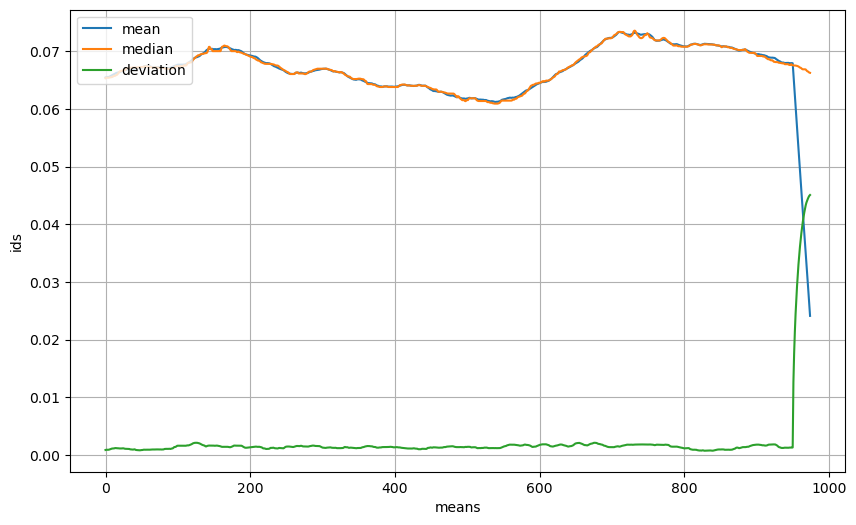

In [11]:
plt.figure(figsize=(10, 6))
#plt.scatter(data_mean, ids, data_median, ids)
plt.plot(ids, data_mean, label = 'mean')
plt.plot(ids, data_median, label = 'median')
plt.plot(ids, data_std, label = 'deviation')
plt.xlabel('means')
plt.ylabel('ids')
plt.legend(['mean', 'median', 'deviation'], loc='upper left')
plt.grid(True)


plt.show()

In [12]:
epy_mean = []
epy_median=[]
epy_std= []
ids=[]

for x in range(int(len(segments)/2), len(segments)):
    ids.append(x)
    epy_mean.append(np.mean(segments[x]))
    epy_median.append(np.median(segments[x]))
    epy_std.append(np.std(segments[x]))

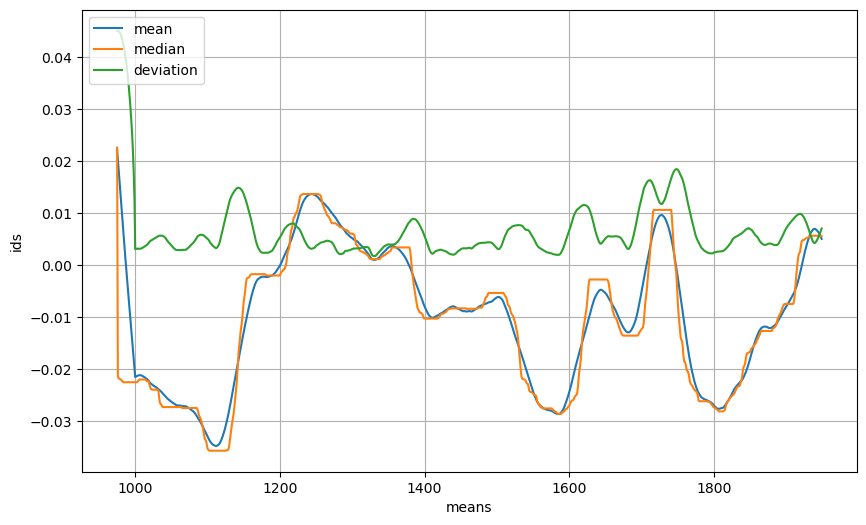

In [13]:
plt.figure(figsize=(10, 6))
#plt.scatter(data_mean, ids, data_median, ids)
plt.plot(ids, epy_mean, label = 'mean')
plt.plot(ids, epy_median, label = 'median')
plt.plot(ids, epy_std, label = 'deviation')
plt.xlabel('means')
plt.ylabel('ids')
plt.legend(['mean', 'median', 'deviation'], loc='upper left')
plt.grid(True)


plt.show()

In [14]:
result_mean = []
result_median=[]
result_std= []
segment_ids=[]
for x in range(0,len(segments)):
    segment_ids.append(x)
    result_mean.append(np.mean(segments[x]))
    result_median.append(np.median(segments[x]))
    result_std.append(np.std(segments[x]))

#len(result_mean)

Feature Extraction

In [15]:
segment_stat_inferences = pd.DataFrame({
    'Segment_idx':segment_ids,
    'Mean': result_mean,
    'Median':result_median,
    'Std Deviation': result_std,
    
})

In [16]:
segment_stat_inferences['Mean'][0]

0.06544178455885509

In [17]:
segment_stat_inferences.head()

,Segment_idx,Mean,Median,Std Deviation
0,0,0.065442,0.065311,0.000855
1,1,0.065498,0.065388,0.000890
2,2,0.065531,0.065410,0.000887
3,3,0.065522,0.065388,0.000891
4,4,0.065514,0.065388,0.000890


In [18]:
segment_stat_inferences.tail()
    

,Segment_idx,Mean,Median,Std Deviation
1945,1945,0.006209,0.005648,0.005549
1946,1946,0.005959,0.005648,0.005907
1947,1947,0.005669,0.005648,0.006271
1948,1948,0.005360,0.005566,0.006643
1949,1949,0.005037,0.005566,0.007040


In [19]:
feature_for_segment = ['Mean','Median','Std Deviation']
segment_stat_inferences[feature_for_segment].head()

,Mean,Median,Std Deviation
0,0.065442,0.065311,0.000855
1,0.065498,0.065388,0.000890
2,0.065531,0.065410,0.000887
3,0.065522,0.065388,0.000891
4,0.065514,0.065388,0.000890


In [20]:
segment_stat_inferences[feature_for_segment]

,Mean,Median,Std Deviation
0,0.065442,0.065311,0.000855
1,0.065498,0.065388,0.000890
2,0.065531,0.065410,0.000887
3,0.065522,0.065388,0.000891
4,0.065514,0.065388,0.000890
...,...,...,...
1945,0.006209,0.005648,0.005549
1946,0.005959,0.005648,0.005907
1947,0.005669,0.005648,0.006271
1948,0.005360,0.005566,0.006643


In [57]:
segment_stat_inferences.values[1000]

array([1000, -0.02156844537705183, -0.022569438442587852,
       0.003061262578999612, 'epy'], dtype=object)

In [21]:
segment_stat_inferences['label']= ''
for i in range(0, len(segment_stat_inferences)):
    if segment_stat_inferences['Segment_idx'][i] < 1000:
        segment_stat_inferences['label'][i] = 'normal'
    else:
        segment_stat_inferences['label'][i]= 'epy'

C:\Users\HP\AppData\Local\Temp\ipykernel_29552\2252171010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_stat_inferences['label'][i] = 'normal'
C:\Users\HP\AppData\Local\Temp\ipykernel_29552\2252171010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_stat_inferences['label'][i]= 'epy'


In [22]:
df= segment_stat_inferences.sample(frac = 1, random_state = 5).reset_index(drop = True)

In [23]:
segment_stat_inferences['label'][0:5]

0    normal
1    normal
2    normal
3    normal
4    normal
Name: label, dtype: object

In [24]:
df['label'][0:5]

0    normal
1       epy
2    normal
3       epy
4       epy
Name: label, dtype: object

RBFN

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X =  segment_stat_inferences[feature_for_segment].values
y =  segment_stat_inferences['label'].values

# Encode labels (if needed)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
count = []
for i in range(len(y_train)):
    if(y_train[i]==0):
        count.append('normal')  
    else:
        count.append('epy')
df_values = pd.DataFrame(pd.Series(count))

df_values.describe()


# so out of 2000 data points, 1560 points were taken as training sets, out of which class imbalance can be seen as epy appears 798 times 
# but normal appears 762 times.

,0
count,1560
unique,2
top,epy
freq,798


In [27]:
X_train[0:5]

array([[ 1.06505354,  1.05183898, -0.57261369],
       [ 0.82943001,  0.81415557, -0.52770547],
       [-0.8422743 , -0.76251475,  0.10451051],
       [-1.03105444, -1.02949113, -0.20407912],
       [ 1.01716389,  0.98939714, -0.42525786]])

In [109]:
X_train[0]

array([ 1.06505354,  1.05183898, -0.57261369])

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np

class RBFLayer(Layer):
    def __init__(self, units, gamma=None, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='random_uniform',
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.units,),
                                     initializer='ones',
                                     trainable=True)

    def call(self, inputs):
        # Compute the Gaussian radial basis function
        C = tf.expand_dims(self.centers, axis=0)
        X = tf.expand_dims(inputs, axis=1)
        diff = X - C
        l2 = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.betas * l2)



In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()


model.add(RBFLayer(10, input_shape=(X_train.shape[1],)))

model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
X_train.shape[1]

3

In [34]:
history = model.fit(X_train, y_train, epochs=50, batch_size=3, validation_data=(X_test, y_test))


Epoch 1/50
520/520 [==============================] - 2s 2ms/step - loss: 0.4791 - accuracy: 0.8750 - val_loss: 0.2230 - val_accuracy: 0.9718
Epoch 2/50
520/520 [==============================] - 1s 2ms/step - loss: 0.1352 - accuracy: 0.9756 - val_loss: 0.0815 - val_accuracy: 0.9718
Epoch 3/50
520/520 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9756 - val_loss: 0.0562 - val_accuracy: 0.9718
Epoch 4/50
520/520 [==============================] - 1s 2ms/step - loss: 0.0442 - accuracy: 0.9756 - val_loss: 0.0475 - val_accuracy: 0.9718
Epoch 5/50
520/520 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9756 - val_loss: 0.0434 - val_accuracy: 0.9718
Epoch 6/50
520/520 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9756 - val_loss: 0.0405 - val_accuracy: 0.9718
Epoch 7/50
520/520 [==============================] - 1s 2ms/step - loss: 0.0293 - accuracy: 0.9756 - val_loss: 0.0384 - val_accuracy: 0.9718
Epoch 

In [35]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

13/13 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9974
Test accuracy: 0.9974


13/13 [==============================] - 0s 1ms/step
R-squared: 0.98683418


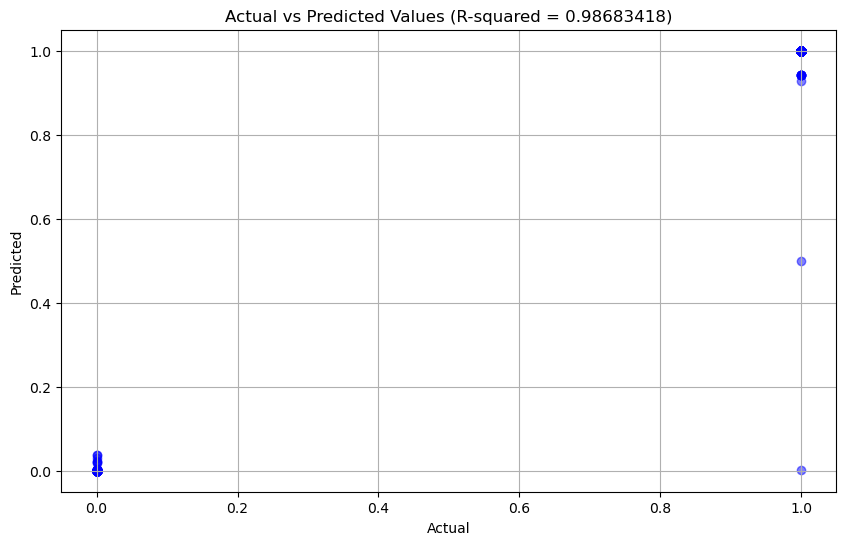

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.8f}')

# Step 3: Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted Values (R-squared = {r2:.8f})')
plt.grid(True)
plt.show()

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAD (Mean Absolute Deviation)
mad = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAD: {mad:.4f}')


RMSE: 0.0573
MAD: 0.0059


In [38]:
df = [y_test, y_pred]

In [60]:
len(y_test)

390

In [36]:
type(y_test)

numpy.ndarray

In [37]:
list1= []
test1= []
for i in range(390):
    if y_test[i]== 1:
        test1.append(test1)
        list1.append(y_pred[i])


In [59]:
from sklearn.metrics import precision_score, recall_score

#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)


In [34]:
list1= []
for i in range(390):
    if y_test[i]== 1:
        list1.append(y_pred[i])

    


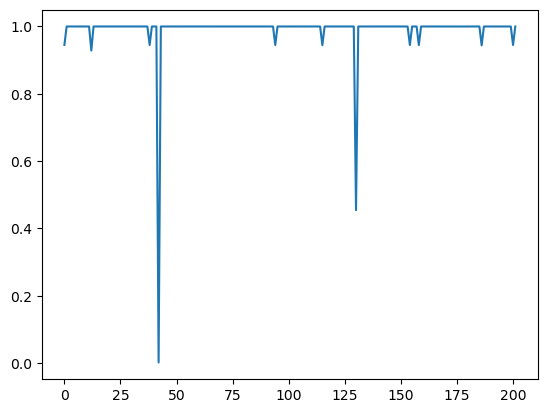

In [69]:
plt.plot(list1)

In [70]:
list1= []
for i in range(390):
    if y_test[i]== 0:
        list1.append(y_pred[i])

    

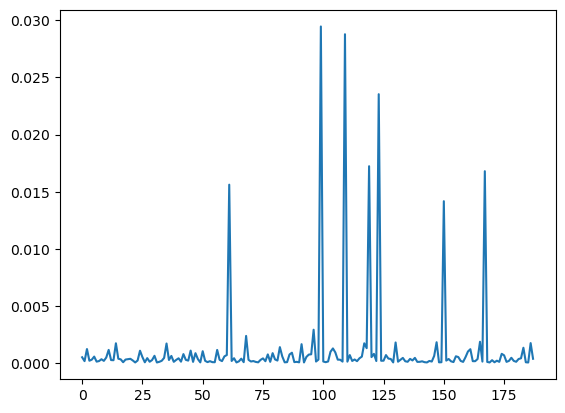

In [71]:
plt.plot(list1)